Average Cholesterol Levels by Heart Disease Status:

* Task: Calculate the average cholesterol level for patients with and without heart disease.

* Mapper: Emits key-value pairs where the key is "disease" or "no_disease" and the value is the cholesterol level.

* Reducer: Computes the average cholesterol level for each group.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the data set and basic exploration

In [57]:
df = pd.read_csv(r'D:\\UPG_Machine_Learning\\Kaggle_Projects\\Heart Disease Prediction\heart.csv')

In [58]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [59]:
df.shape

(918, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [61]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [62]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [63]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [64]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Visualizing categorical columns

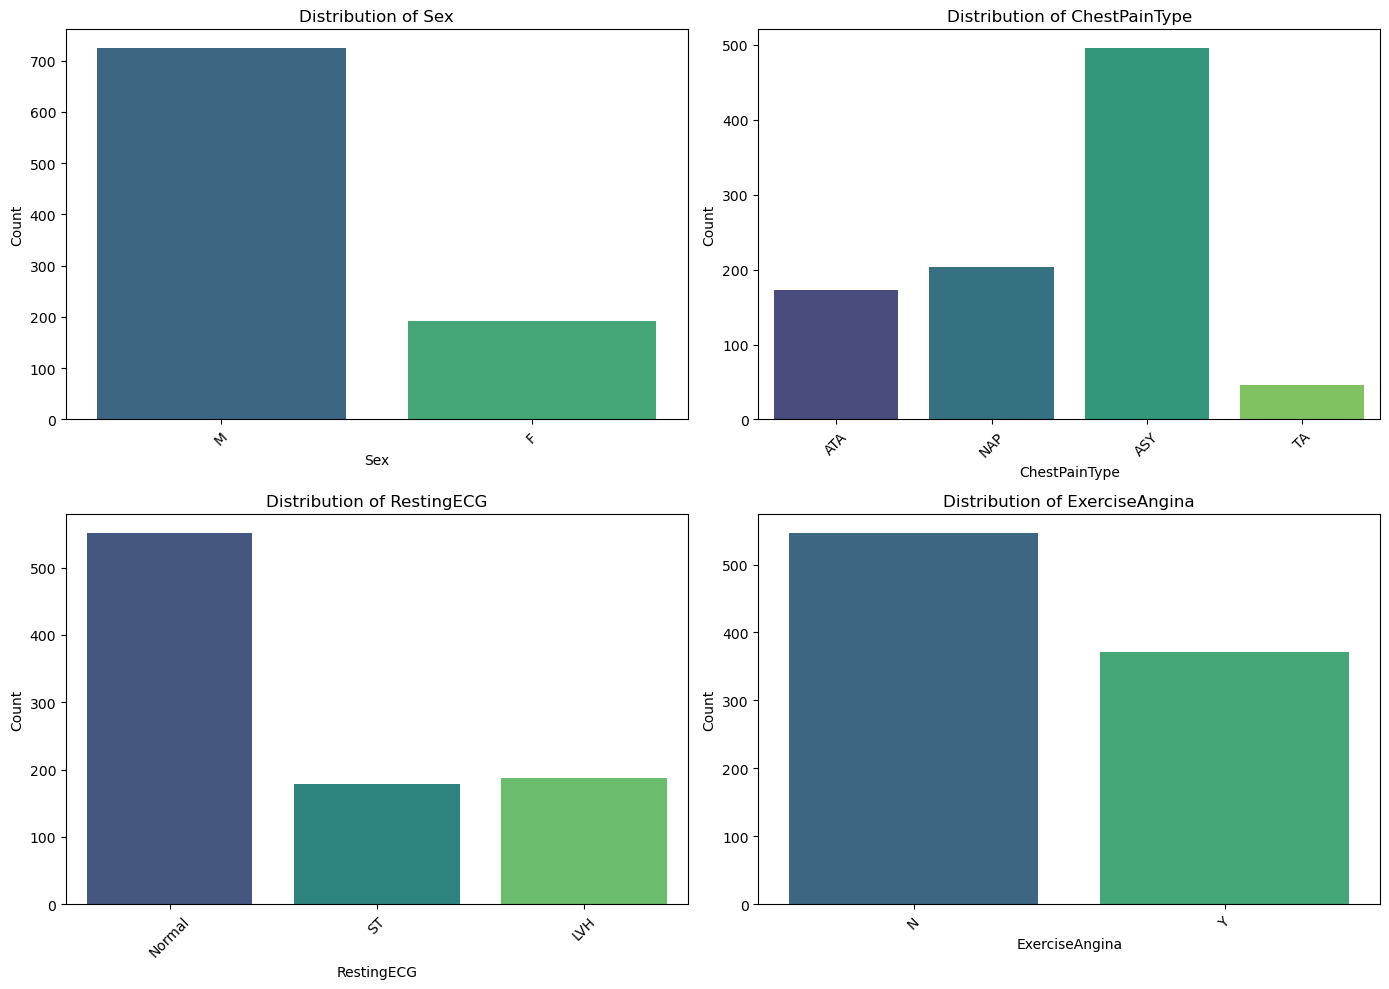

In [65]:
categorical_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

# Set up the figure and axes
plt.figure(figsize=(14, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=var, palette="viridis", hue=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Percentile wise distribution of numerical columns and Boxplot

In [66]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Desired percentiles
percentiles = [0.25, 0.50, 0.75, 0.99]

# Calculate the percentiles and display
percentile_data = df[numerical_columns].quantile(percentiles)
percentile_data.index = ['25th', '50th', '75th', '99th']  # Rename the index for clarity
print(percentile_data)

       Age  RestingBP  Cholesterol  MaxHR
25th  47.0      120.0       173.25  120.0
50th  54.0      130.0       223.00  138.0
75th  60.0      140.0       267.00  156.0
99th  74.0      180.0       411.49  186.0


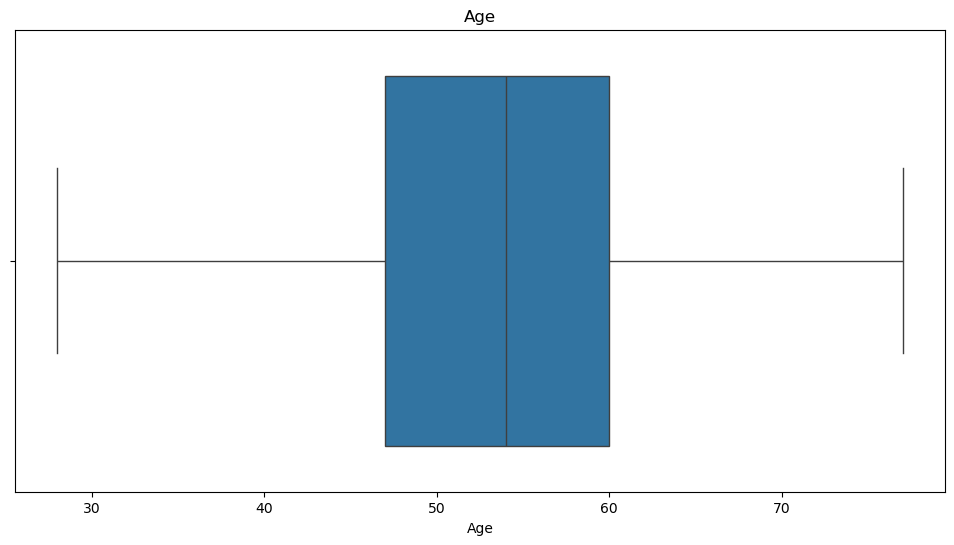

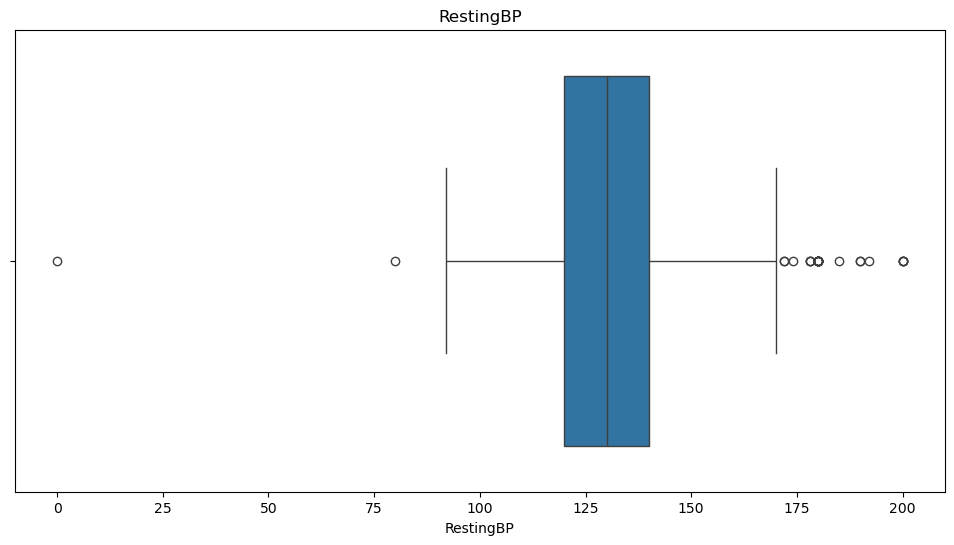

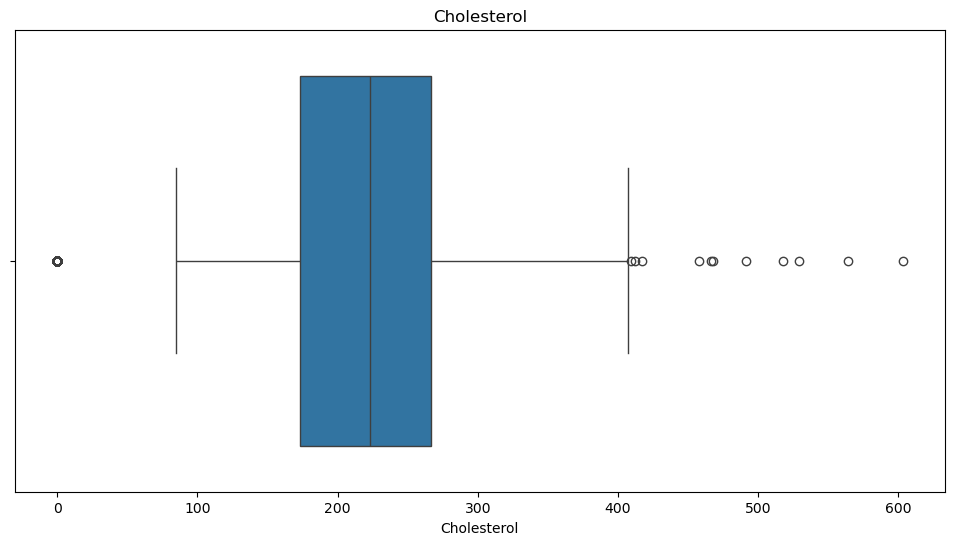

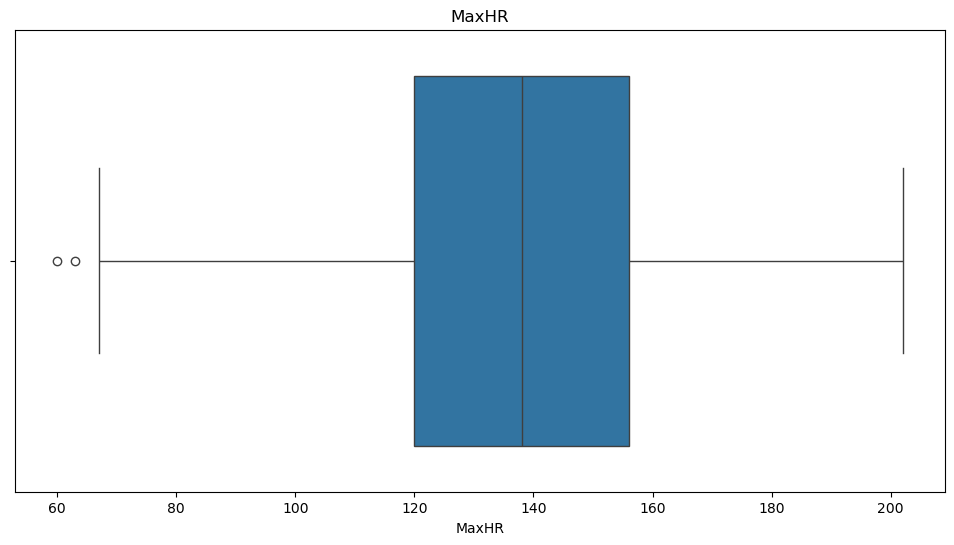

In [67]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

## Removing rows with zero or NA values present in numerical columns

In [68]:
df = df[(df['RestingBP'] !=0) & (df['Cholesterol']!=0)]

In [69]:
df.shape

(746, 12)

In [70]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Encoding Categorical Variables

In [71]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
print(df.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0   40        140          289          0    172      0.0             0  False   True              False               True              False             False           False               True          False              True             False          False          False         True
1   49        160          180          0    156      1.0             1   True  False              False              False               True             False           False               True          False              True             False          False           True        False
2   37        130          283          0     98      0.0             0  False   True              False               True       

In [72]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'], dtype='object')

## Enable Feature Scaling for numerical features

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())


        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0 -1.356073   0.403980     0.750494          0  1.296470 -0.840942             0  False   True              False               True              False             False           False               True          False              True             False          False          False         True
1 -0.408656   1.561980    -1.093405          0  0.643613  0.091771             1   True  False              False              False               True             False           False               True          False              True             False          False           True        False
2 -1.671879  -0.175019     0.648995          0 -1.722993 -0.840942             0  False   True         

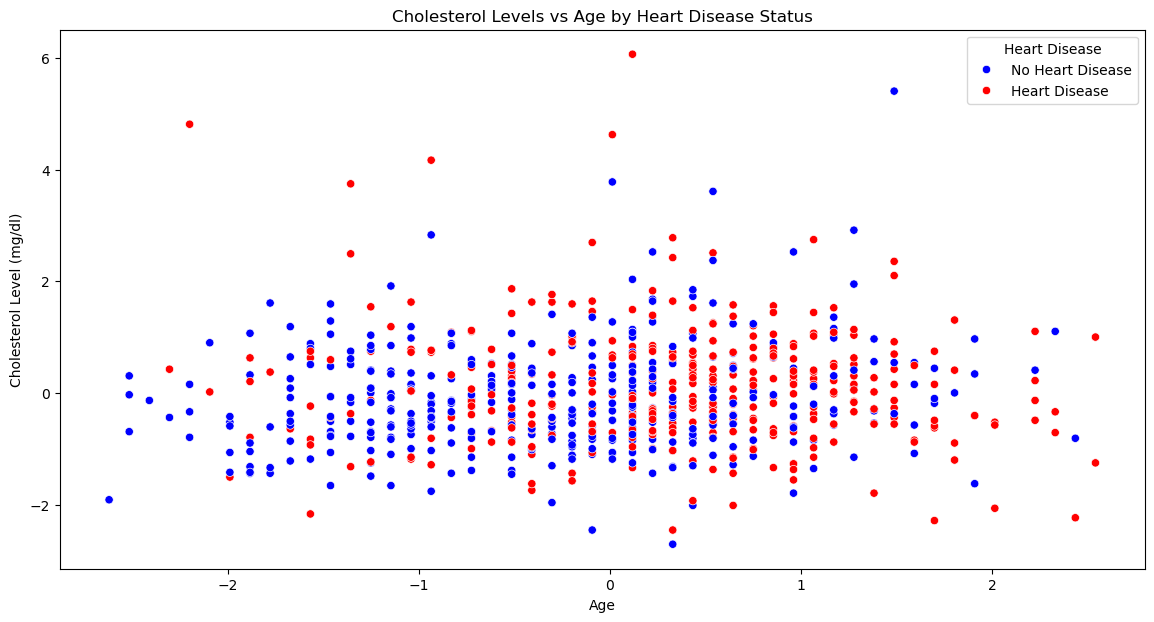

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
# Use 'Set1' palette which has distinct colors
sns.scatterplot(x='Age', y='Cholesterol', hue='HeartDisease', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Cholesterol Levels vs Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level (mg/dl)')
# Explicitly set the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No Heart Disease', 'Heart Disease']
plt.legend(handles, labels, title='Heart Disease')
plt.show()


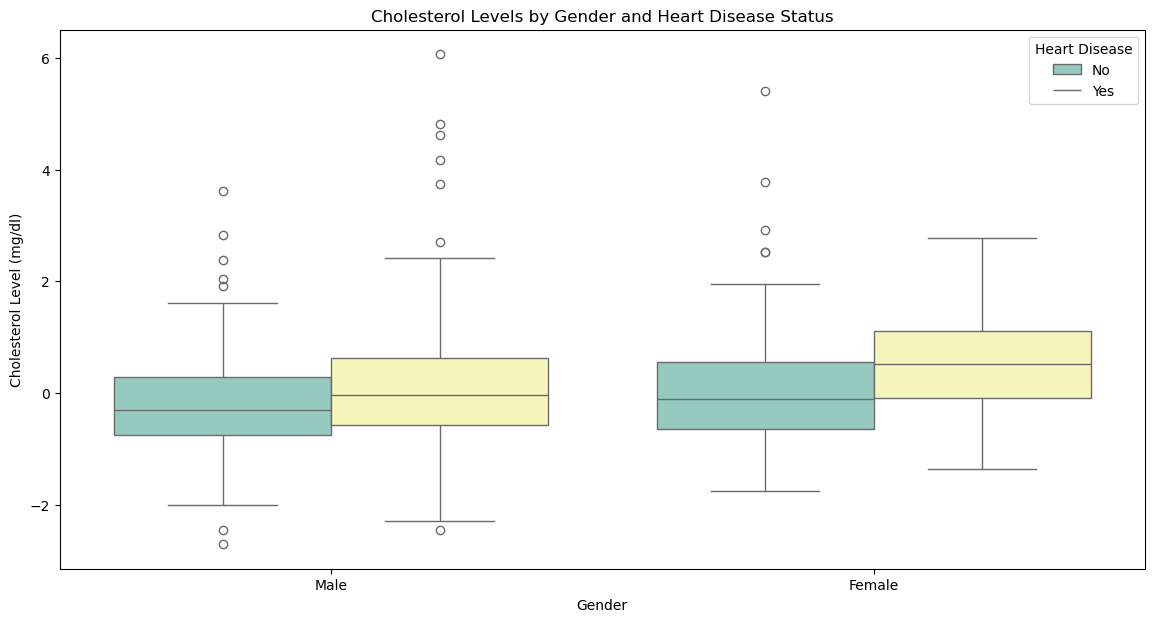

In [75]:
# Create a 'Gender' column for visualization purposes
df['Gender'] = df.apply(lambda row: 'Male' if row['Sex_M'] == 1 else 'Female', axis=1)

plt.figure(figsize=(14, 7))
sns.boxplot(x='Gender', y='Cholesterol', hue='HeartDisease', palette='Set3', data=df)
plt.title('Cholesterol Levels by Gender and Heart Disease Status')
plt.xlabel('Gender')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


In [76]:
df.dtypes

Age                  float64
RestingBP            float64
Cholesterol          float64
FastingBS              int64
MaxHR                float64
Oldpeak              float64
HeartDisease           int64
Sex_F                   bool
Sex_M                   bool
ChestPainType_ASY       bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_LVH          bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_N        bool
ExerciseAngina_Y        bool
ST_Slope_Down           bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
Gender                object
dtype: object

In [77]:
df.to_csv('preprocessed_heart_disease_dataset.csv', index=False)

# write the command to upload to HDFS
